In [1]:
basedir = '/home/abhinavgupta0110/NeuralODEs_ROM_Closure'

import os

is_google_colab = False
is_use_GPU = False

In [2]:
if is_use_GPU:
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
        print('No GPU found!')
    else:
        print(gpu_info)

if is_google_colab:
    from google.colab import drive
    drive.mount('/content/drive')

    %pip install quadpy

os.chdir(os.path.join(basedir, 'neuralDDE_ROM_Closure'))

In [3]:
from src.utilities.DDE_Solver import ddeinttf 
import src.bio_eqn_case.bio_eqn as bio

import time
from math import *
from IPython.core.debugger import set_trace

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tf.keras.backend.set_floatx('float32')

In [4]:
class initial_cond:

    def __init__(self, app):
        self.app = app

    def __call__(self, t):

        if self.app.bio_model == 'NPZ':
            x0 = [self.app.T_bio - 0.5*2, 0.5, 0.5]
        elif self.app.bio_model == 'NPZD':
            x0 = [self.app.T_bio - 0.5*2, 0.5, 0.5, 0.]
        elif self.app.bio_model == 'NNPZD':
            x0 = [self.app.T_bio/2., self.app.T_bio/2. - 2*0.5, 0.5, 0.5, 0.]
        return tf.convert_to_tensor([x0], dtype=tf.float32)

## NPZ Model

In [5]:
app = bio.bio_eqn_args(T = 50., nt = 500, z = -15, k_w = 0.067, alpha = 0.025, V_m = 1.5, I_0 = 158.075, K_u = 1., Psi = 1.46,
                    Xi = 0.1, R_m = 1.5, Lambda = 0.06, gamma = 0.3, Tau = 0.145, Phi = 0.175, Omega = 0.041, T_bio = 30, bio_model = 'NPZ')

x0 = initial_cond(app) # Initial conditions
t = tf.linspace(0., app.T, app.nt) # Time array

In [6]:
x_npz = ddeinttf(bio.bio_eqn(app), x0, t)

/home/abhinavgupta0110/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning: dopri5: larger nsteps is needed
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


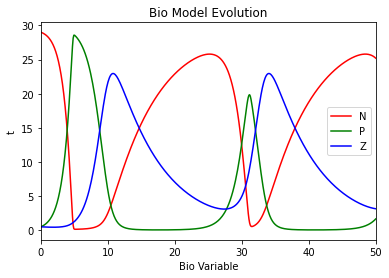

In [7]:
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax_x1 = fig.add_subplot(111)

ax_x1.cla()
ax_x1.set_title('Bio Model Evolution')
ax_x1.set_xlabel('Bio Variable')
ax_x1.set_ylabel('t')
ax_x1.plot(t.numpy(), x_npz[:, 0, 0], '-r', label = 'N')
ax_x1.plot(t.numpy(), x_npz[:, 0, 1], '-g', label = 'P')
ax_x1.plot(t.numpy(), x_npz[:, 0, 2], '-b', label = 'Z')
ax_x1.set_xlim(t[0], t[-1])
ax_x1.legend(loc = 'best')


## NPZD Model

In [8]:
app = bio.bio_eqn_args(T = 50., nt = 500, z = -15, k_w = 0.067, alpha = 0.025, V_m = 1.5, I_0 = 158.075, K_u = 1., Psi = 1.46,
                    Xi = 0.1, R_m = 1., Lambda = 0.06, gamma = 0.3, Tau = 0.145, Phi = 0.175, Omega = 0.041, T_bio = 30, bio_model = 'NPZD')

x0 = initial_cond(app) # Initial conditions
t = tf.linspace(0., app.T, app.nt) # Time array

In [9]:
x_npzd = ddeinttf(bio.bio_eqn(app), x0, t)

/home/abhinavgupta0110/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning: dopri5: larger nsteps is needed
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


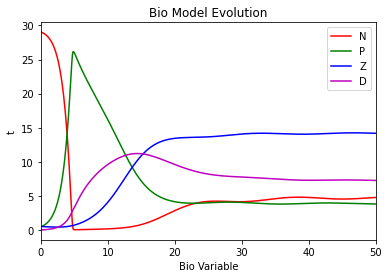

In [10]:
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax_x1 = fig.add_subplot(111)

ax_x1.cla()
ax_x1.set_title('Bio Model Evolution')
ax_x1.set_xlabel('Bio Variable')
ax_x1.set_ylabel('t')
ax_x1.plot(t.numpy(), x_npzd[:, 0, 0], '-r', label = 'N')
ax_x1.plot(t.numpy(), x_npzd[:, 0, 1], '-g', label = 'P')
ax_x1.plot(t.numpy(), x_npzd[:, 0, 2], '-b', label = 'Z')
ax_x1.plot(t.numpy(), x_npzd[:, 0, 3], '-m', label = 'D')
ax_x1.set_xlim(t[0], t[-1])
ax_x1.legend(loc = 'best')

## NNPZD Model

In [11]:
app = bio.bio_eqn_args(T = 50., nt = 500, z = -15, k_w = 0.067, alpha = 0.025, V_m = 1.5, I_0 = 158.075, K_u = 1., Psi = 1.46,
                    Xi = 0.1, R_m = 1.5, Lambda = 0.06, gamma = 0.3, Tau = 0.145, Phi = 0.175, Omega = 0.041, T_bio = 30, bio_model = 'NNPZD')

x0 = initial_cond(app) # Initial conditions
t = tf.linspace(0., app.T, app.nt) # Time array

In [12]:
x_nnpzd = ddeinttf(bio.bio_eqn(app), x0, t)

/home/abhinavgupta0110/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning: dopri5: larger nsteps is needed
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


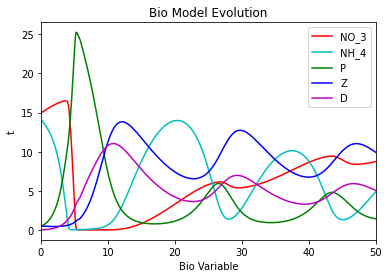

In [13]:
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax_x1 = fig.add_subplot(111)

ax_x1.cla()
ax_x1.set_title('Bio Model Evolution')
ax_x1.set_xlabel('Bio Variable')
ax_x1.set_ylabel('t')
ax_x1.plot(t.numpy(), x_nnpzd[:, 0, 0], '-r', label = 'NO_3')
ax_x1.plot(t.numpy(), x_nnpzd[:, 0, 1], '-c', label = 'NH_4')
ax_x1.plot(t.numpy(), x_nnpzd[:, 0, 2], '-g', label = 'P')
ax_x1.plot(t.numpy(), x_nnpzd[:, 0, 3], '-b', label = 'Z')
ax_x1.plot(t.numpy(), x_nnpzd[:, 0, 4], '-m', label = 'D')
ax_x1.set_xlim(t[0], t[-1])
ax_x1.legend(loc = 'best')

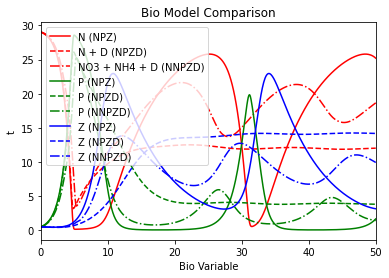

In [14]:
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax_x1 = fig.add_subplot(111)

ax_x1.cla()
ax_x1.set_title('Bio Model Comparison')
ax_x1.set_xlabel('Bio Variable')
ax_x1.set_ylabel('t')
ax_x1.plot(t.numpy(), x_npz[:, 0, 0], '-r', label = 'N (NPZ)')
ax_x1.plot(t.numpy(), x_npzd[:, 0, 0] + x_npzd[:, 0, 3], '--r', label = 'N + D (NPZD)')
ax_x1.plot(t.numpy(), x_nnpzd[:, 0, 0] + x_nnpzd[:, 0, 1] + x_nnpzd[:, 0, 4], '-.r', label = 'NO3 + NH4 + D (NNPZD)')
ax_x1.plot(t.numpy(), x_npz[:, 0, 1], '-g', label = 'P (NPZ)')
ax_x1.plot(t.numpy(), x_npzd[:, 0, 1], '--g', label = 'P (NPZD)')
ax_x1.plot(t.numpy(), x_nnpzd[:, 0, 2], '-.g', label = 'P (NNPZD)')
ax_x1.plot(t.numpy(), x_npz[:, 0, 2], '-b', label = 'Z (NPZ)')
ax_x1.plot(t.numpy(), x_npzd[:, 0, 2], '--b', label = 'Z (NPZD)')
ax_x1.plot(t.numpy(), x_nnpzd[:, 0, 3], '-.b', label = 'Z (NNPZD)')
ax_x1.set_xlim(t[0], t[-1])
ax_x1.legend(loc = 'best')